# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Confidence intervals
### VIDEO: Bootstrapping confidence intervals
#### TEACHER: Mike X Cohen, sincxpress.com

In [2]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.patches import Polygon

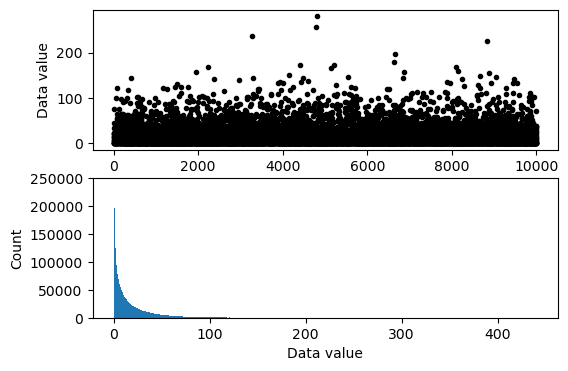

In [3]:
## simulate data - Bootstrapping/resampling example

popN = int(1e7)  # lots and LOTS of data!!

# the data (note: non-normal!)
population = (4*np.random.randn(popN))**2

# we can calculate the exact population mean
popMean = np.mean(population)

# let's see it
fig,ax = plt.subplots(2,1,figsize=(6,4))

# only plot every 1000th sample
ax[0].plot(population[::1000],'k.')
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')

ax[1].hist(population,bins='fd')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Data value')
ax[1].set_ylim(0,250000)
plt.show()


In [7]:
## draw a random sample

# parameters
## NOTE: as N sample size increases the theoretical and analytic CI will converge - We need larger sample sizes for more accurate results (for ex try with 50 instead of 100 and watch the difference in last cell output grow wider)
samplesize = 100
confidence = 95 # in percent

# compute sample mean
randSamples = np.random.randint(0,popN,samplesize)
sampledata  = population[randSamples] # this is the sample set will will resample from 
samplemean  = np.mean(population[randSamples])
samplestd   = np.std(population[randSamples]) # used later for analytic solution



### now for bootstrapping
numBoots  = 1000 # run 1000 iterations of resampling
bootmeans = np.zeros(numBoots)

# resample with replacement
for booti in range(numBoots):
    # randomly sample with replacement using np.random.choice() from the sample dataset and take the mean of that and store it
    # note that this is not new samples from a population - we work with the same single sample set
    bootmeans[booti] = np.mean( np.random.choice(sampledata,samplesize) )
    

# find confidence intervals
confint = [0,0] # initialize
# either side of the tails - get the lower and upper bounds for a 95 percent confidence interval
confint[0] = np.percentile(bootmeans,(100-confidence)/2)# <2.5% left tail
confint[1] = np.percentile(bootmeans,100-(100-confidence)/2) # > 97.5% right tail

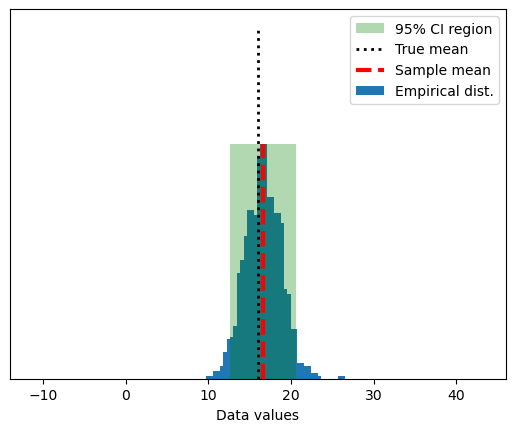

In [10]:
## graph everything
fig,ax = plt.subplots(1,1)

# start with histogram of resampled means
y,x = np.histogram(bootmeans,40)
y = y/max(y)
x = (x[:-1]+x[1:])/2
ax.bar(x,y)

y = np.array([ [confint[0],0],[confint[1],0],[confint[1],1],[confint[0],1] ])
p = Polygon(y,facecolor='g',alpha=.3)
ax.add_patch(p)

# now add the lines
ax.plot([popMean,popMean],[0, 1.5],'k:',linewidth=2)
ax.plot([samplemean,samplemean],[0, 1],'r--',linewidth=3)
ax.set_xlim([popMean-30, popMean+30])
ax.set_yticks([])
ax.set_xlabel('Data values')
# note that in the real world we usually don't have access to know the population true mean
ax.legend(('%g%% CI region'%confidence,'True mean','Sample mean','Empirical dist.')) # empircial dist is from the resampled data - note it's gaussian because of the central limit theorem (large independent samples aggregated)
plt.show()

In [9]:
## compare against the analytic confidence interval

# compute confidence intervals
citmp = (1-confidence/100)/2
confint2 = samplemean + stats.t.ppf([citmp, 1-citmp],samplesize-1) * samplestd/np.sqrt(samplesize)

# using resampling/bootstraping - this result will vary on new iterations of bootstrapping
print('Empirical: %g - %g'%(confint[0],confint[1]))
# using the formula method for confidence interval - this remains constant when running against same sample/dataset
print('Analytic:  %g - %g'%(confint2[0],confint2[1]))

# The results should be close to each other

Empirical: 12.5713 - 20.5571
Analytic:  12.4287 - 20.7509
